In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [3]:
dataDirectory = '/home/h1bennet/strains/data/H3K27Ac/control_cohort2_untrimmed/'
workingDirectory = '/home/h1bennet/strains/results/06_Strains_Control_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [4]:
qc = ngs_qc(dataDirectory, 'atac')

/home/h1bennet/strains/data/H3K27Ac/control_cohort2_untrimmed//
./control_cohort2_untrimmed_qc/


/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsm

<Figure size 432x288 with 0 Axes>

In [5]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1028_TDT_l20201212_CTCTCGTC_TATAACCT_S26_L001.aj.bowtie2_shifted_from_AJ.sam,17470717.0,107.0,0.004204,0.253,2.722462e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1104_TDT_l20201212_GGCTTAAG_TCGTGACC_S29_L001.aj.bowtie2_shifted_from_AJ.sam,8867059.0,107.0,0.001986,0.187,2.722464e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1118_TDT_l20201212_CGGCGTGA_GCGCCTGT_S32_L001.aj.bowtie2_shifted_from_AJ.sam,11430325.0,107.0,0.002583,0.195,2.722462e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ChIP_input_Chow_healthyoung_AJ1028_TDT_l20201212_TCCAACGC_TTGGACTT_S41_L001.aj.bowtie2_shifted_from_AJ.sam,20624492.0,190.0,0.004410,0.144,2.722445e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ChIP_input_Chow_healthyoung_AJ1104_TDT_l20201212_GGCATTCT_CTAGCTTG_S44_L001.aj.bowtie2_shifted_from_AJ.sam,56367877.0,186.0,0.012953,0.211,2.722472e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ChIP_input_Chow_healthyoung_AJ1118_TDT_l20201212_CGTTAGAA_TTCAGGTC_S47_L001.aj.bowtie2_shifted_from_AJ.sam,21809005.0,184.0,0.004818,0.175,2.722467e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1028_TDT_l20201212_CCAAGTCT_AAGGATGA_S27_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam,10704042.0,107.0,0.002887,0.360,2.722432e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1104_TDT_l20201212_AATCCGGA_CTACAGTT_S30_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam,10922133.0,110.0,0.002285,0.124,2.722437e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1118_TDT_l20201212_ATGTAAGT_ACTCTATG_S33_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam,15531884.0,107.0,0.003378,0.160,2.722460e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_balbcj_Male_Kupffer_ChIP_input_Chow_healthyoung_BALB1028_TDT_l20201212_CCGTGAAG_CAGTGGAT_S42_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam,19145303.0,197.0,0.004189,0.166,2.722466e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Actually somewhat evenly distributated reads and clonalities!

### Plot tag count distribution

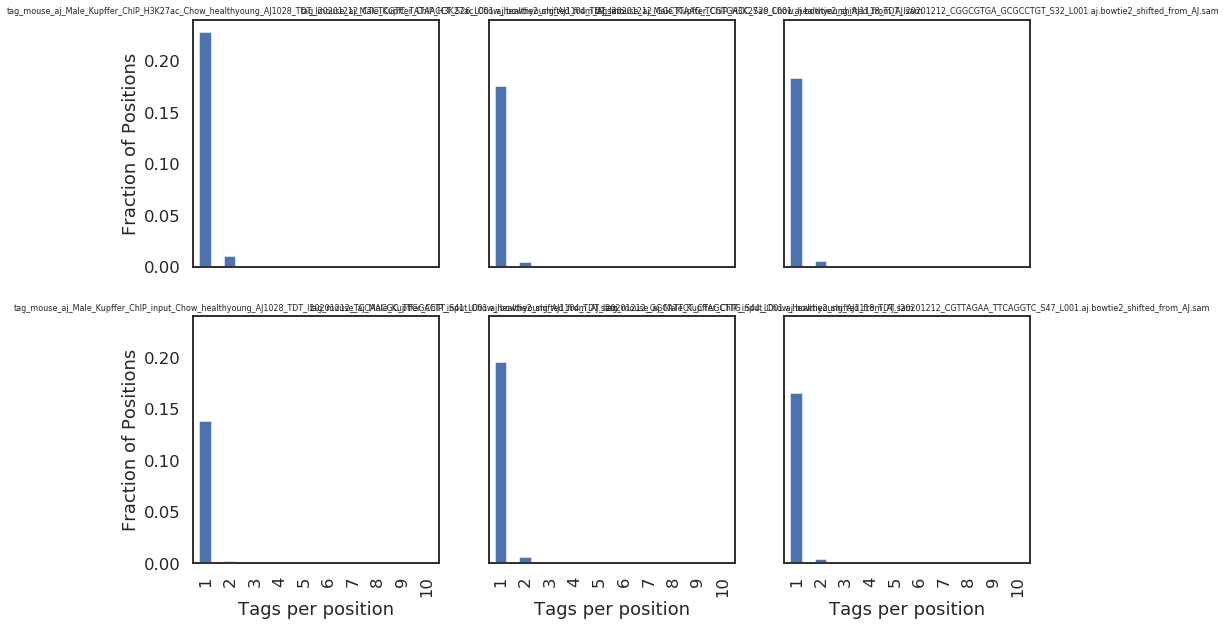

In [6]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

 Based on the browser tracks and the qc for these samples this experiment will probably need to be redone.

# Find peaks

In [7]:
if not os.path.isdir('./peak_files/'):
    os.mkdir('./peak_files')

In [8]:
# set input directory
# inputdir = "00_mouse_MPSIIIAhet_M_P240_NeuN_input_2_AL_20191122_CCAACA"

with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in np.sort(glob.glob(dataDirectory+'/*H3K27ac*')):
        if 'aj' in tagdir:
            inputdir='tag_mouse_aj_Male_Kupffer_ChIP_input_Chow_healthyoung_AJ1028_TDT_l20201212_TCCAACGC_TTGGACTT_S41_L001.aj.bowtie2_shifted_from_AJ.sam'
        elif 'balb' in tagdir:
            inputdir='tag_mouse_balbcj_Male_Kupffer_ChIP_input_Chow_healthyoung_BALB1028_TDT_l20201212_CCGTGAAG_CAGTGGAT_S42_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam'
        elif 'c57bl6' in tagdir:
            inputdir='tag_mouse_c57bl6j_Male_Kupffer_ChIP_input_Chow_healthyoung_C571104_TDT_l20201212_TACCGAGG_CCTGAACT_S46_L001.c57bl6j.bowtie2_shifted_from_C57BL6J.sam'
        
        find_peaks_fw = ['findPeaks', tagdir,
                          '-i', dataDirectory + '/' + inputdir,
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir.split('/')[-1] + '_fixedwidth_peaks.tsv',
                          '&', '\n\n']
        find_peaks = ['findPeaks', tagdir,
                          '-i', dataDirectory + '/' + inputdir, '-region',
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir.split('/')[-1] + '_variablewidth_peaks.tsv',
                          '&', '\n\n']
        # write commands to file
        f.write(' '.join(find_peaks_fw))
        f.write(' '.join(find_peaks))

In [9]:
peak_stats={}

for td in np.sort(os.listdir('./peak_files/')):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df.loc[df.index.str.contains('variablewidth')]

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1028_TDT_l20201212_CTCTCGTC_TATAACCT_S26_L001.aj.bowtie2_shifted_from_AJ.sam_variablewidth_peaks.tsv,14735.0,18.20,479.0,0.0,1.0
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1104_TDT_l20201212_GGCTTAAG_TCGTGACC_S29_L001.aj.bowtie2_shifted_from_AJ.sam_variablewidth_peaks.tsv,17564.0,33.45,144.0,0.0,3.0
tag_mouse_aj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_AJ1118_TDT_l20201212_CGGCGTGA_GCGCCTGT_S32_L001.aj.bowtie2_shifted_from_AJ.sam_variablewidth_peaks.tsv,11756.0,11.95,266.0,0.0,2.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1028_TDT_l20201212_CCAAGTCT_AAGGATGA_S27_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam_variablewidth_peaks.tsv,11335.0,12.59,482.0,0.0,1.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1104_TDT_l20201212_AATCCGGA_CTACAGTT_S30_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam_variablewidth_peaks.tsv,18911.0,38.50,337.0,0.0,6.0
tag_mouse_balbcj_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_BALB1118_TDT_l20201212_ATGTAAGT_ACTCTATG_S33_L001.balbcj.bowtie2_shifted_from_BALBCJ.sam_variablewidth_peaks.tsv,15549.0,23.81,531.0,0.0,1.0
tag_mouse_c57bl6j_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_C571028_TDT_l20201212_TTGGACTC_GGAAGCAG_S28_L001.c57bl6j.bowtie2_shifted_from_C57BL6J.sam_variablewidth_peaks.tsv,1347.0,1.01,0.0,0.0,73.0
tag_mouse_c57bl6j_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_C571104_TDT_l20201212_TAATACAG_ATATTCAC_S31_L001.c57bl6j.bowtie2_shifted_from_C57BL6J.sam_variablewidth_peaks.tsv,18089.0,28.15,188.0,0.0,3.0
tag_mouse_c57bl6j_Male_Kupffer_ChIP_H3K27ac_Chow_healthyoung_C571118_TDT_l20201212_GCACGGAC_GTCTCGCA_S34_L001.c57bl6j.bowtie2_shifted_from_C57BL6J.sam_variablewidth_peaks.tsv,4286.0,2.36,37.0,0.0,2.0


Happily enough these IP efficiencies look pretty similar across all the samples!

### Write to files

In [13]:
df.loc[df.index.str.contains('variable'), :].to_csv('./variablewidth_peak_table.txt', sep='\t')
df.loc[df.index.str.contains('fixed'), :].to_csv('./fixedwidth_peak_table.txt', sep='\t') 